In [113]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

**Problem:** Estimate an NBA players salary by using all the features available.

**Table of contents:**
    Data cleaning
    
    Visualization
    
    Feature Selection
    
    
    ML (linear, KNN, MLP, Forest)
    
    Discussion

**Data Cleaning:**

In [114]:
data = pd.read_csv('nba2k20-full copy.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB
None


In [115]:
data['b_day']= pd.to_datetime(data['b_day'],infer_datetime_format=True, errors='coerce')
print(data.isnull().sum().sum())


89


In [116]:
data= data.dropna()
print(data.isnull().sum().sum())
print(data.info())

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    344 non-null    object        
 1   rating       344 non-null    int64         
 2   jersey       344 non-null    object        
 3   team         344 non-null    object        
 4   position     344 non-null    object        
 5   b_day        344 non-null    datetime64[ns]
 6   height       344 non-null    object        
 7   weight       344 non-null    object        
 8   salary       344 non-null    object        
 9   country      344 non-null    object        
 10  draft_year   344 non-null    int64         
 11  draft_round  344 non-null    object        
 12  draft_peak   344 non-null    object        
 13  college      344 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 40.3+ KB
None


In [117]:
today = pd.to_datetime(date.today())
data['b_day']= today-data['b_day']
print(data.info())
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   full_name    344 non-null    object         
 1   rating       344 non-null    int64          
 2   jersey       344 non-null    object         
 3   team         344 non-null    object         
 4   position     344 non-null    object         
 5   b_day        344 non-null    timedelta64[ns]
 6   height       344 non-null    object         
 7   weight       344 non-null    object         
 8   salary       344 non-null    object         
 9   country      344 non-null    object         
 10  draft_year   344 non-null    int64          
 11  draft_round  344 non-null    object         
 12  draft_peak   344 non-null    object         
 13  college      344 non-null    object         
dtypes: int64(2), object(11), timedelta64[ns](1)
memory usage: 40.3+ KB
None
       full_name  

In [118]:
data['b_day']= (data['b_day']).dt.days


In [119]:
data['b_day']= data['b_day']/365
print(data.info())
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    344 non-null    object 
 1   rating       344 non-null    int64  
 2   jersey       344 non-null    object 
 3   team         344 non-null    object 
 4   position     344 non-null    object 
 5   b_day        344 non-null    float64
 6   height       344 non-null    object 
 7   weight       344 non-null    object 
 8   salary       344 non-null    object 
 9   country      344 non-null    object 
 10  draft_year   344 non-null    int64  
 11  draft_round  344 non-null    object 
 12  draft_peak   344 non-null    object 
 13  college      344 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 40.3+ KB
None
       full_name  rating jersey                  team position      b_day  \
1  Kawhi Leonard      97     #2  Los Angeles Clippers        F  30.126027   


In [120]:

#for index, row in data.iterrows():
#    string= data.loc[index]['height']
#    print(string)
#    data[index]['height']= string[-4]
 
    #print(string[-4:])
    #= string[-4:]
data['height'] = data['height'].str[-4:]


In [121]:
data['salary']= data['salary'].str[1:]

In [122]:
for item in ['height','salary','draft_round','draft_peak']:
    data[item]= pd.to_numeric(data[item], errors='coerce')
#data['salary']=pd.to_numeric(data['salary'])

In [123]:
data = data.dropna()
print(data.isnull().sum().sum())
print(data.head(3))
print(data.info())

0
       full_name  rating jersey                  team position      b_day  \
1  Kawhi Leonard      97     #2  Los Angeles Clippers        F  30.126027   
3   Kevin Durant      96     #7         Brooklyn Nets        F  32.873973   
4   James Harden      96    #13       Houston Rockets        G  31.967123   

   height                weight    salary country  draft_year  draft_round  \
1    2.01  225 lbs. / 102.1 kg.  32742000     USA        2011          1.0   
3    2.08  230 lbs. / 104.3 kg.  37199000     USA        2007          1.0   
4    1.96   220 lbs. / 99.8 kg.  38199000     USA        2009          1.0   

   draft_peak          college  
1        15.0  San Diego State  
3         2.0            Texas  
4         3.0    Arizona State  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 425
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    292 non-null    object 
 1   rating  

**Visualizing Our Data**

/Users/aerrowfar/Documents/Code/Data_Mining/Lab 7/env/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


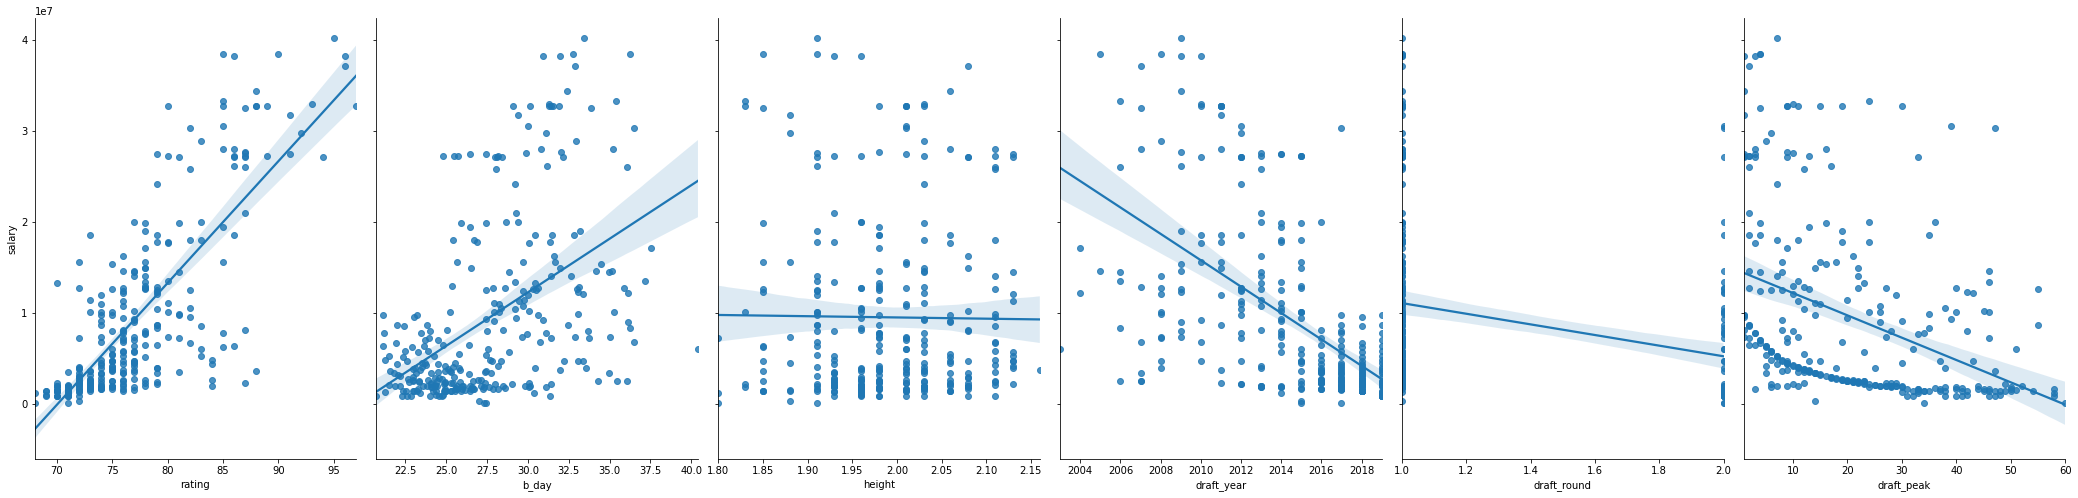

In [124]:

sns.pairplot(data, x_vars=['rating','b_day','height','draft_year','draft_round','draft_peak'], y_vars='salary', size=7, aspect=0.7, kind='reg')

**Feature Selection**

In [125]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 425
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    292 non-null    object 
 1   rating       292 non-null    int64  
 2   jersey       292 non-null    object 
 3   team         292 non-null    object 
 4   position     292 non-null    object 
 5   b_day        292 non-null    float64
 6   height       292 non-null    float64
 7   weight       292 non-null    object 
 8   salary       292 non-null    int64  
 9   country      292 non-null    object 
 10  draft_year   292 non-null    int64  
 11  draft_round  292 non-null    float64
 12  draft_peak   292 non-null    float64
 13  college      292 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 34.2+ KB
None


In [126]:
x = data[['rating','b_day','height','draft_year','draft_round','draft_peak']]
y = data[['salary']]

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [128]:
from sklearn.feature_selection import f_regression

#y2 = y_train.ravel()
feats= f_regression(X_train, y_train, center=True)


/Users/aerrowfar/Documents/Code/Data_Mining/Lab 7/env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**Feature Selection:**

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10)



In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

#Use SelectKBest for feature selectio.
fs = SelectKBest(score_func=f_regression, k='all')

fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)

X_test_fs = fs.transform(X_test)
#print(X_train_fs)
#print(X_test_fs)


feat 0: 365.734544
feat 1: 66.536947
feat 2: 0.440102
feat 3: 101.947292
feat 4: 19.151675
feat 5: 48.077266


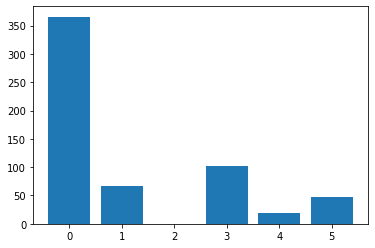

In [156]:
for i in range(len(fs.scores_)):
    print('feat %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

We can see here features 0,3,5 corresponding to Rating, Draft year, and Draft Peak are doing almost all the work. Features 2,4 can be elliminated: draft round and height.

In [157]:
x = data[['rating','b_day','draft_year','draft_peak']]
y = data[['salary']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10)

**Linear Regression:**

In [158]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_train, y_train))

print(reg.coef_)

print(reg.intercept_)

y_predict = reg.predict(X_test)


0.7040805393677058
[[1123107.03480912  414391.28695491 -336694.4882957   -49999.4272525 ]]
[5.90795104e+08]


In [160]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_predict, squared=False))

5419125.511613832


**KNN Regression:**

In [161]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_predict_knn= neigh.predict(X_test)


In [162]:

print(mean_squared_error(y_test, y_predict_knn, squared=False))

6218310.678106501


**Random Forest Regressor:**

In [163]:
from sklearn.ensemble import RandomForestRegressor

y_train = y_train.values.ravel()

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_predict_for= regr.predict(X_test)


In [164]:
print(mean_squared_error(y_test, y_predict_for,squared=False))

4469374.8522940315


**MLP Regression:**

In [165]:
from sklearn.neural_network import MLPRegressor

#y_train = y_train.values.ravel()

regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
y_predict_mlp = regr.predict(X_test)

print(regr.score(X_test, y_test))

-0.022643550254209055


In [166]:
print(mean_squared_error(y_test, y_predict_mlp, squared=False))

8539396.641722243


**Discussion:**

Random Forest regressor here wins. This is probably because random forest regrssor prevents overfitting by default, which might be going on with KNN and lienar. It is surprising to see MLP not perform well here as it usually performs well. 

Note: the mean squared root error you see is how far off we are from their multi million dollar salary. So in case of forest, we're off by 4 million dollars, so in the context of large numbers to begin with, we are doing fairly well since salaries are in 10s of millions.